In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [74]:
data = pd.read_csv('E:/DataFrame/DataForPracticePreProcessing/Market.csv')
market_data = data[data['Index'] == 'NYA']
market_data

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,12-31-1965,529.0,529.0,529.0,529.0,529.0,0.000000e+00
1,NYA,01-03-1966,527.0,527.0,527.0,527.0,527.0,0.000000e+00
2,NYA,01-04-1966,528.0,528.0,528.0,528.0,528.0,0.000000e+00
3,NYA,01-05-1966,531.0,531.0,531.0,531.0,531.0,0.000000e+00
4,NYA,01-06-1966,532.0,532.0,532.0,532.0,532.0,0.000000e+00
...,...,...,...,...,...,...,...,...
13943,NYA,5-24-2021,16375.0,16509.0,16375.0,16465.0,16465.0,2.947400e+09
13944,NYA,5-25-2021,16465.0,16526.0,16375.0,16390.0,16390.0,3.420870e+09
13945,NYA,5-26-2021,16390.0,16466.0,16388.0,16452.0,16452.0,3.674490e+09
13946,NYA,5-27-2021,16452.0,16546.0,16452.0,16532.0,16532.0,5.201110e+09


In [75]:
market_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,13947.000000,13946.000000,13945.000000,13944.000000,13938.000000,1.394700e+04
mean,4452.150355,4469.318299,4434.265687,4453.031555,4455.099440,1.215565e+09
std,4074.833665,4094.960088,4052.815025,4075.485577,4075.458503,1.834155e+09
min,348.000000,348.000000,348.000000,348.000000,348.000000,0.000000e+00
25%,655.000000,655.000000,655.000000,655.000000,656.000000,0.000000e+00
50%,2632.000000,2632.000000,2632.000000,2632.000000,2633.000000,0.000000e+00
75%,7339.500000,7376.500000,7278.000000,7339.750000,7342.750000,2.681975e+09
max,16590.000000,16686.000000,16532.000000,16590.000000,16590.000000,1.145623e+10


In [76]:
## Null Values in each columns 
line = 15 * '-'
print(f'\nMissing values :\n{line}\n{market_data.isnull().sum()}')


Missing values :
---------------
Index         0
Date          0
Open          1
High          2
Low           3
Close         4
Adj Close    10
Volume        1
dtype: int64


In [77]:
df0 = pd.DataFrame(market_data)

df0['Date'] = pd.to_datetime(df0['Date'])
df0['Year'] = df0['Date'].apply(lambda t:t.year) 
df0['Month'] = df0['Date'].apply(lambda t:t.month) 
df0['Day'] = df0['Date'].apply(lambda t:t.day)

davg_df2m = df0.groupby('Month').mean() 
df0

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,NYA,1965-12-31,529.0,529.0,529.0,529.0,529.0,0.000000e+00,1965,12,31
1,NYA,1966-01-03,527.0,527.0,527.0,527.0,527.0,0.000000e+00,1966,1,3
2,NYA,1966-01-04,528.0,528.0,528.0,528.0,528.0,0.000000e+00,1966,1,4
3,NYA,1966-01-05,531.0,531.0,531.0,531.0,531.0,0.000000e+00,1966,1,5
4,NYA,1966-01-06,532.0,532.0,532.0,532.0,532.0,0.000000e+00,1966,1,6
...,...,...,...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.0,16509.0,16375.0,16465.0,16465.0,2.947400e+09,2021,5,24
13944,NYA,2021-05-25,16465.0,16526.0,16375.0,16390.0,16390.0,3.420870e+09,2021,5,25
13945,NYA,2021-05-26,16390.0,16466.0,16388.0,16452.0,16452.0,3.674490e+09,2021,5,26
13946,NYA,2021-05-27,16452.0,16546.0,16452.0,16532.0,16532.0,5.201110e+09,2021,5,27


In [78]:
columns = df0.columns
columns

Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Year', 'Month', 'Day'],
      dtype='object')

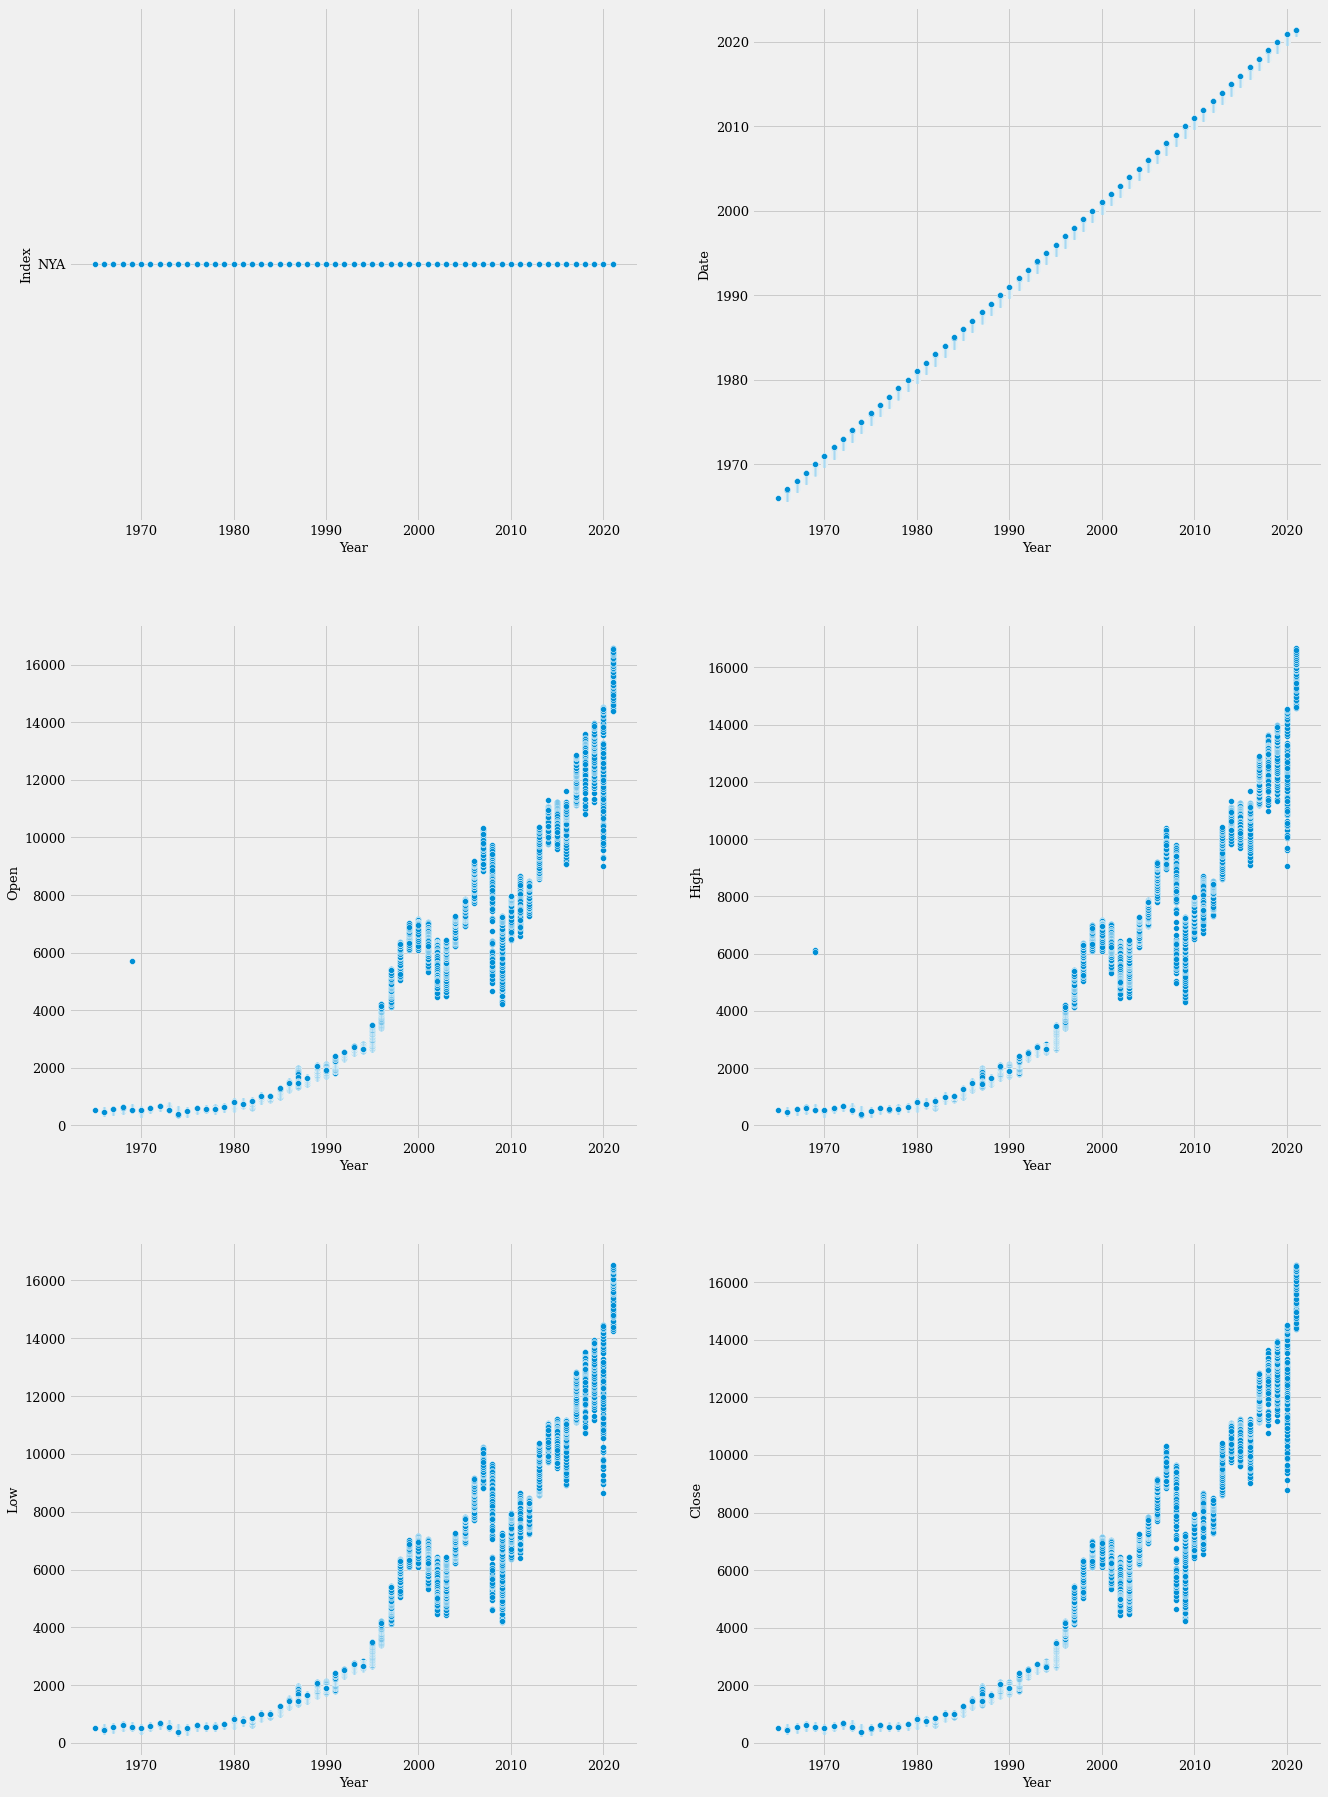

In [79]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 30))

for num in range(0,6):
    ax = plt.subplot(3, 2,num+1)
    col = df0.columns[num]
    sns.scatterplot(ax=ax, data=df0, y=df0[col], x=df0['Year'])
    plt.xticks(fontsize =13, fontfamily= 'serif')
    plt.yticks(fontsize =13, fontfamily= 'serif')
    plt.xlabel('Year',fontsize =13, fontfamily= 'serif')
    plt.ylabel(f'{col}',fontsize =13, fontfamily= 'serif')

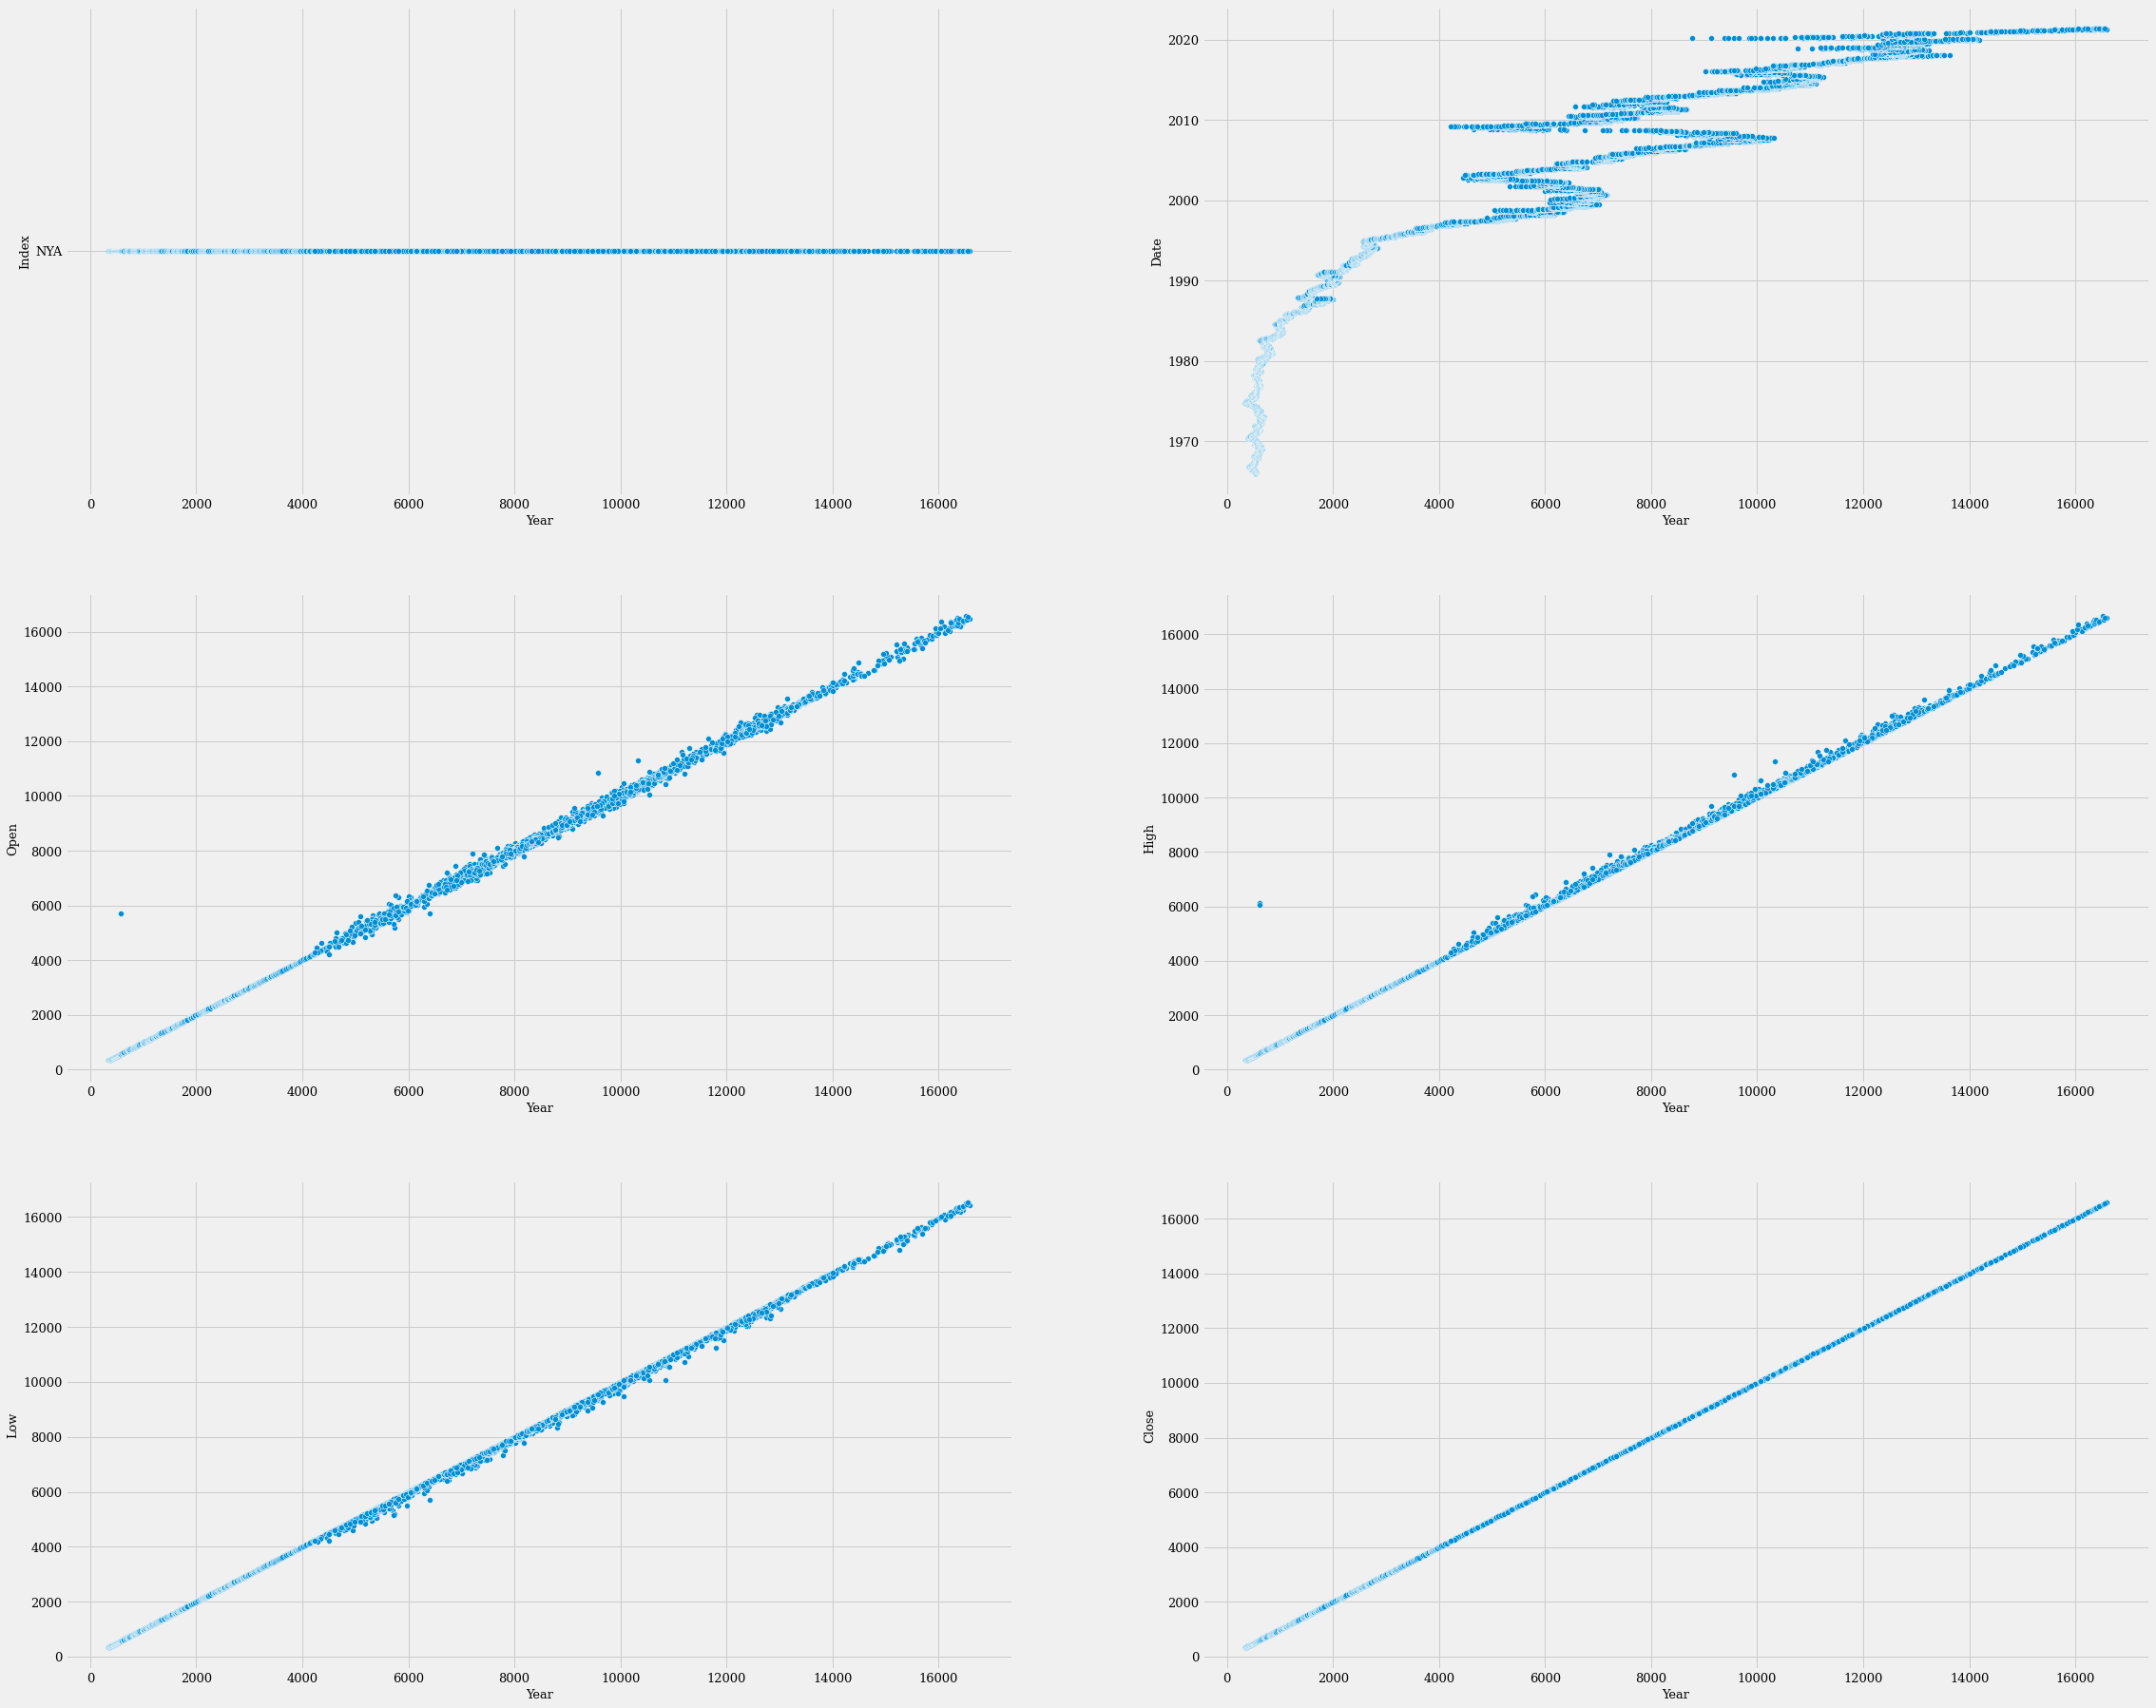

In [80]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(35, 30))

for num in range(0,6):
    ax = plt.subplot(3, 2,num+1)
    col = df0.columns[num]
    sns.scatterplot(ax=ax, data = df0, x = df0['Close'], y = df0[col])
    plt.xticks(fontsize =13, fontfamily= 'serif')
    plt.yticks(fontsize =13, fontfamily= 'serif')
    plt.xlabel('Year',fontsize =13, fontfamily= 'serif')
    plt.ylabel(f'{col}',fontsize =13, fontfamily= 'serif')

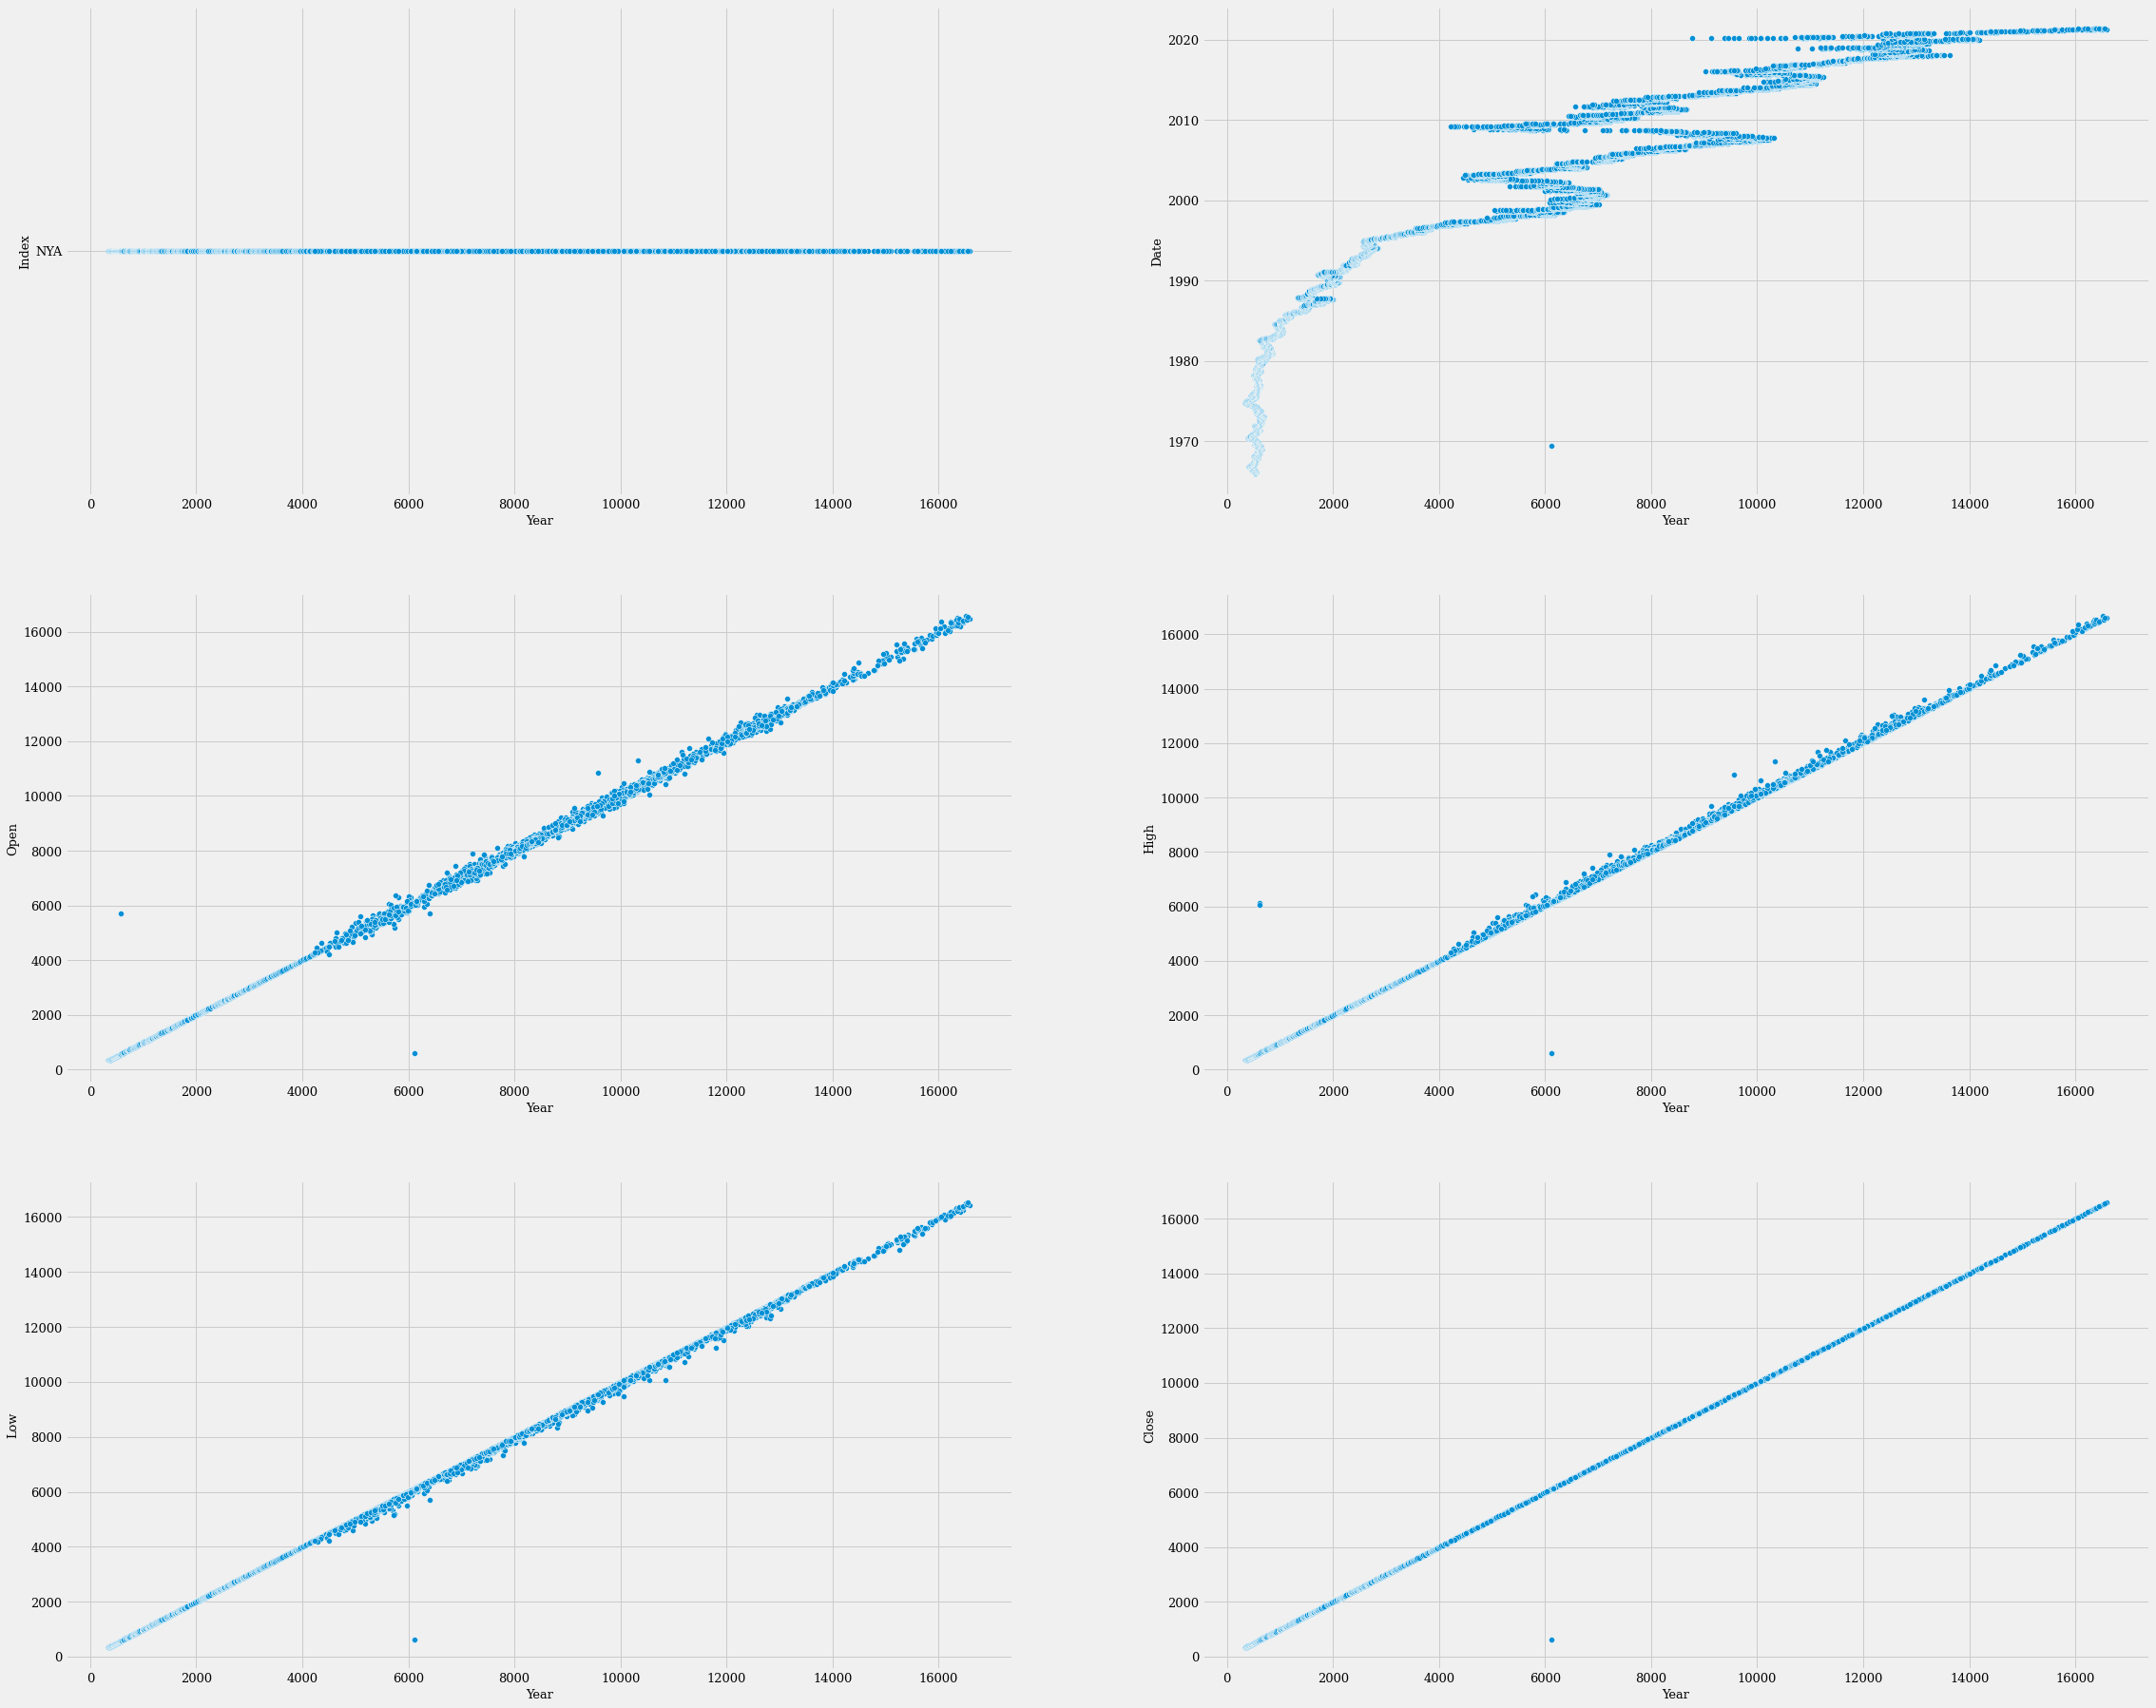

In [81]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(35, 30))

for num in range(0,6):
    ax = plt.subplot(3, 2,num+1)
    col = df0.columns[num]
    sns.scatterplot(ax=ax, data = df0, x = df0['Adj Close'], y = df0[col])
    plt.xticks(fontsize =13, fontfamily= 'serif')
    plt.yticks(fontsize =13, fontfamily= 'serif')
    plt.xlabel('Year',fontsize =13, fontfamily= 'serif')
    plt.ylabel(f'{col}',fontsize =13, fontfamily= 'serif')

In [175]:
# clear all detected Noises in whole dataset
# next step remove or fill null cell data
df = pd.DataFrame(df0)

df1 = df.drop(df[(df['Open'] < 6000) & (df['Adj Close'] < 2000)].index)
df2 = df1.drop(df1[(df1['Open'] < 2000) & (df1['Adj Close'] > 6000)].index)
df3 = df2.drop(df2[(df2['High'] > 5900) & (df2['Adj Close'] <= 1970)].index)
df4 = df3.drop(df3[(df3['High'] > 5900) & (df3['Adj Close'] <= 1970)].index)
df5 = df4.drop(df4[(df4['Adj Close'] > 6000) & (df4['Year'] <= 1970)].index)
df6 = df5.drop(df5[(df5['Adj Close'] > 6000) & (df5['Close'] <= 1970)].index)
df7 = df6.drop(df6[(df6['Volume'] <= 0)].index)
DF = df7.drop(df7[(df7['Adj Close'] >= 6000 )& (df7['Low'] < 2000)].index)
DF = DF[DF['Year'] >= 1970]

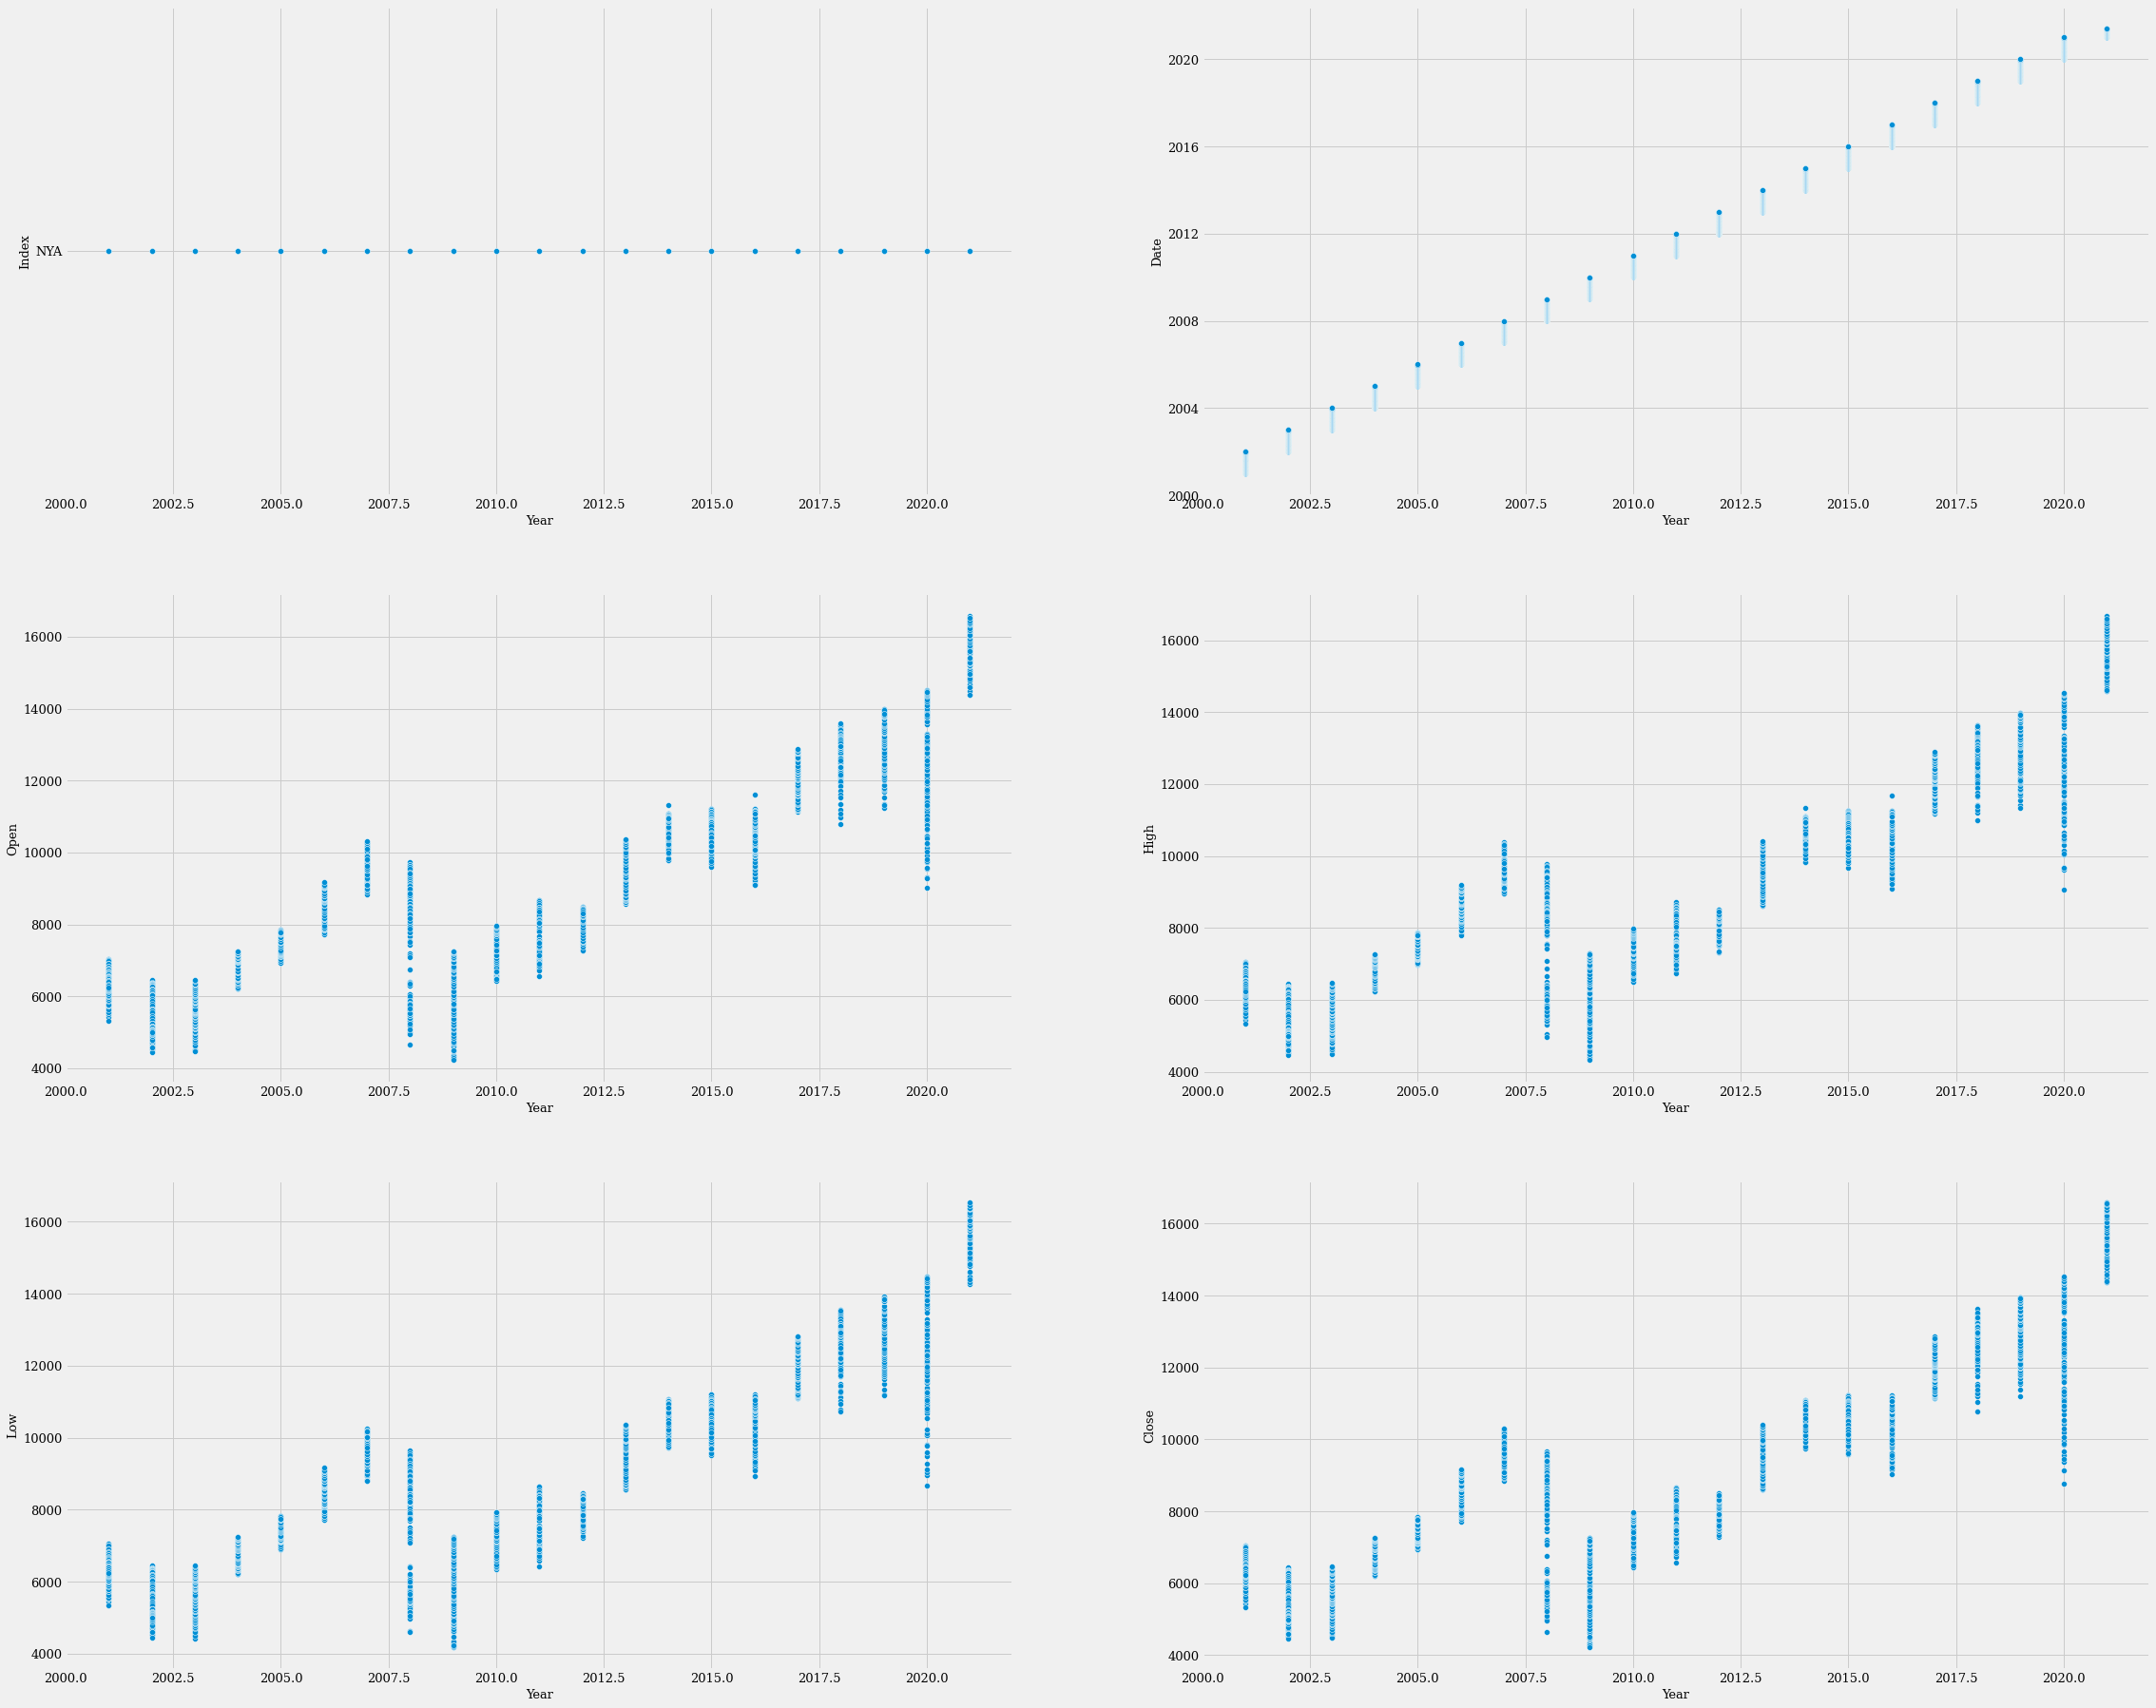

In [126]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(35, 30))

for num in range(0,6):
    ax = plt.subplot(3, 2,num+1)
    col = DF.columns[num]
    sns.scatterplot(ax=ax, data = DF, x = DF['Year'], y = DF[col])
    plt.xticks(fontsize =13, fontfamily= 'serif')
    plt.yticks(fontsize =13, fontfamily= 'serif')
    plt.xlabel('Year',fontsize =13, fontfamily= 'serif')
    plt.ylabel(f'{col}',fontsize =13, fontfamily= 'serif')

Text(0.5, 1.0, 'Market Capasity')

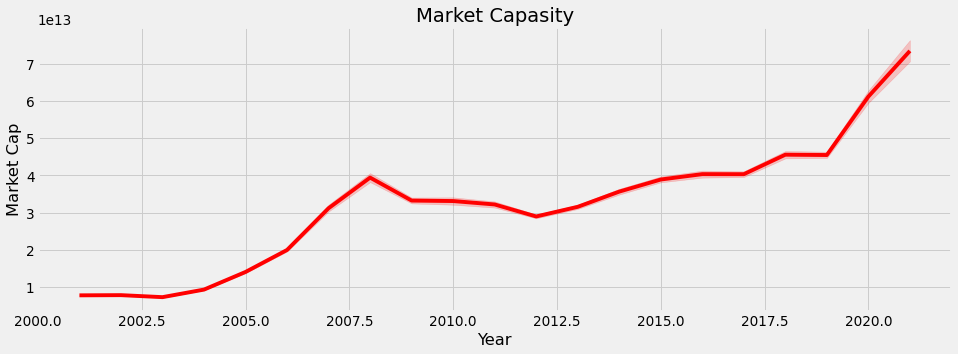

In [127]:
# Market Capasity
DF['Market Cap']= DF['Open'] * DF['Volume']
plt.figure(figsize=(15, 5), dpi=70)
sns.lineplot(data=DF, x=DF['Year'], y =DF['Market Cap'], color = 'r')
plt.title('Market Capasity')

In [128]:
DF.reset_index()
DF.iloc[DF['Market Cap'].argmax()]

Index                         NYA
Date          2021-01-27 00:00:00
Open                      14867.0
High                      14867.0
Low                       14447.0
Close                     14488.0
Adj Close                 14488.0
Volume               9878040000.0
Year                         2021
Month                           1
Day                            27
Market Cap      146856820680000.0
Name: 13862, dtype: object

In [129]:
DF[DF['Date']=='2021-01-27']

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Market Cap
13862,NYA,2021-01-27,14867.0,14867.0,14447.0,14488.0,14488.0,9.878040e+09,2021,1,27,1.468568e+14


In [130]:
DF['vol'] = ( DF.Close / DF.Close.shift(1) ) - 1
DF['vol']

8815          NaN
8816    -0.010618
8817    -0.017549
8818    -0.002214
8819    -0.000592
           ...   
13943    0.005496
13944   -0.004555
13945    0.003783
13946    0.004863
13947    0.001452
Name: vol, Length: 5115, dtype: float64

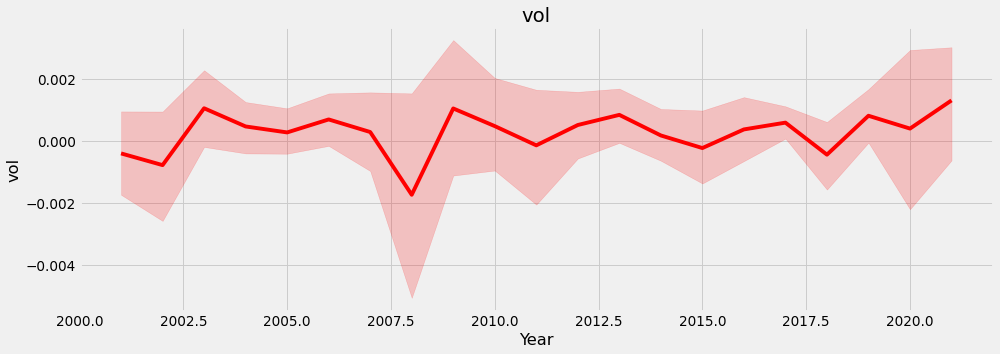

In [131]:
plt.figure(figsize=(15, 5), dpi=70)
sns.lineplot(data=DF, x=DF['Year'], y =DF['vol'], color = 'r')
plt.title('vol')
plt.show()

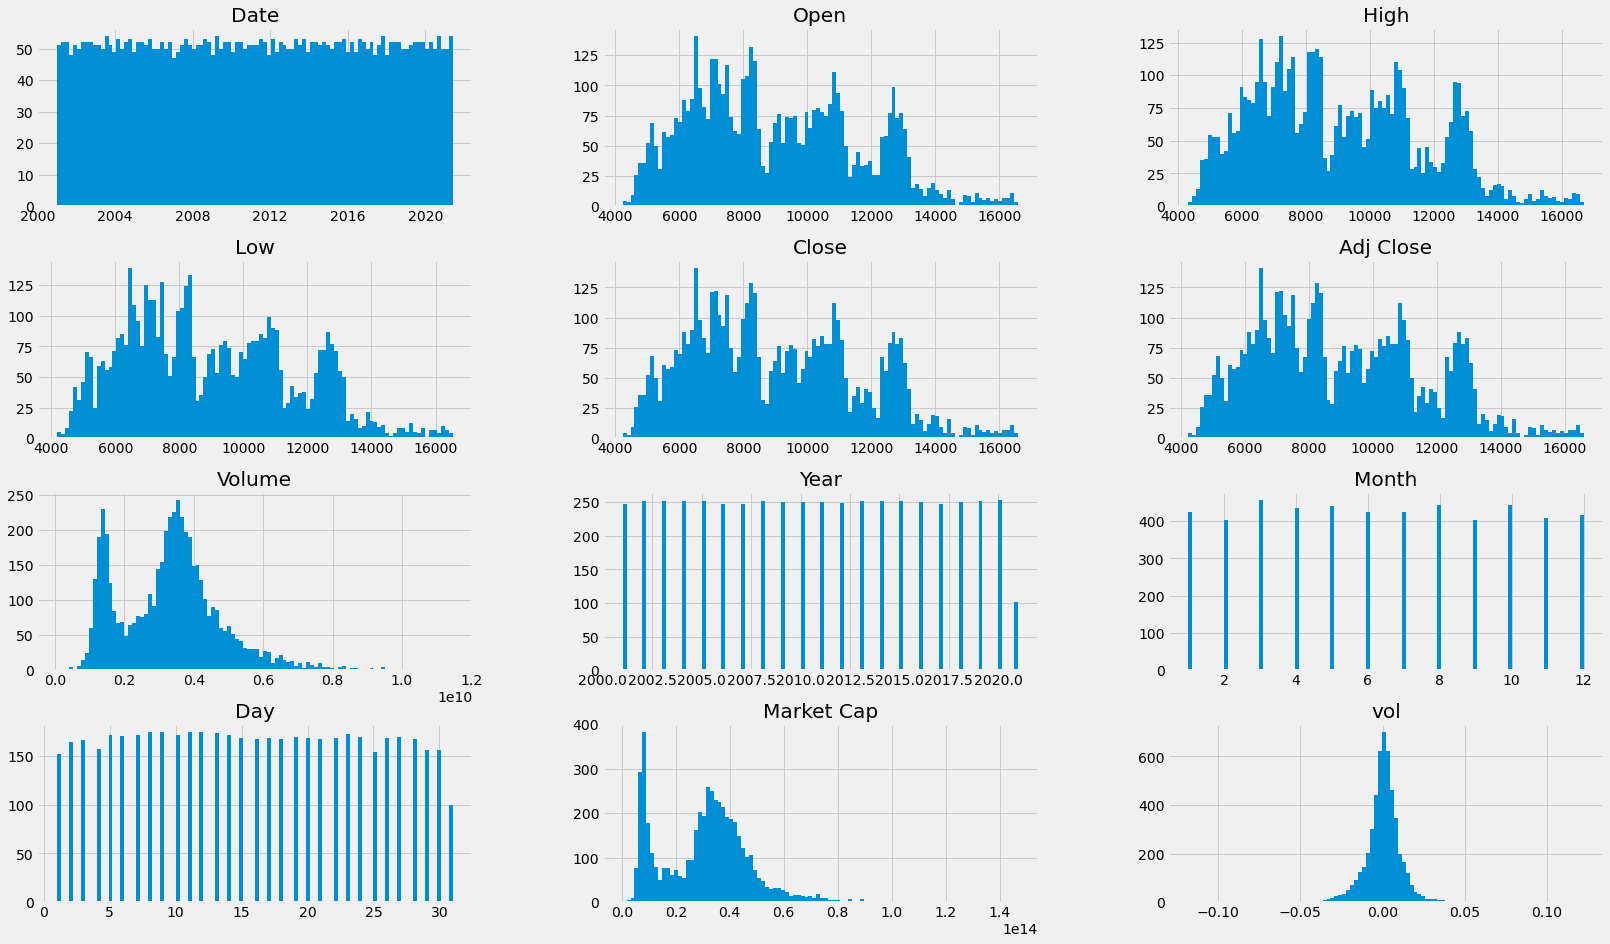

In [132]:
DF.hist(bins=100 , figsize=(25, 15))
plt.show()

In [133]:
DF['Cumulative Return']  = (DF['vol'] + 1).cumprod()
DF

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Market Cap,vol,Cumulative Return
8815,NYA,2001-01-03,6969.0,6969.0,6969.0,6969.0,6969.0,1.880700e+09,2001,1,3,1.310660e+13,NaN,NaN
8816,NYA,2001-01-04,6895.0,6895.0,6895.0,6895.0,6895.0,2.169400e+09,2001,1,4,1.495801e+13,-0.010618,0.989382
8817,NYA,2001-01-05,6774.0,6774.0,6774.0,6774.0,6774.0,1.430800e+09,2001,1,5,9.692239e+12,-0.017549,0.972019
8818,NYA,2001-01-08,6759.0,6759.0,6759.0,6759.0,6759.0,1.115500e+09,2001,1,8,7.539664e+12,-0.002214,0.969867
8819,NYA,2001-01-09,6755.0,6755.0,6755.0,6755.0,6755.0,1.191300e+09,2001,1,9,8.047232e+12,-0.000592,0.969293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.0,16509.0,16375.0,16465.0,16465.0,2.947400e+09,2021,5,24,4.826368e+13,0.005496,2.362606
13944,NYA,2021-05-25,16465.0,16526.0,16375.0,16390.0,16390.0,3.420870e+09,2021,5,25,5.632462e+13,-0.004555,2.351844
13945,NYA,2021-05-26,16390.0,16466.0,16388.0,16452.0,16452.0,3.674490e+09,2021,5,26,6.022489e+13,0.003783,2.360740
13946,NYA,2021-05-27,16452.0,16546.0,16452.0,16532.0,16532.0,5.201110e+09,2021,5,27,8.556866e+13,0.004863,2.372220


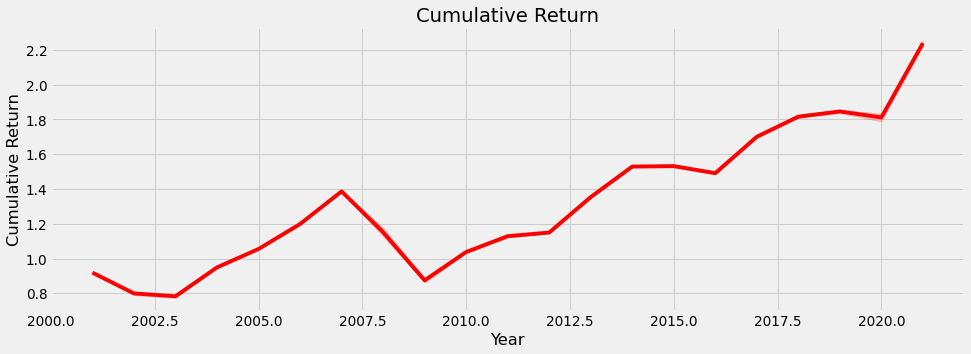

In [134]:
plt.figure(figsize=(15, 5), dpi=70)
sns.lineplot(data=DF, x=DF['Year'], y =DF['Cumulative Return'], color = 'r')
plt.title('Cumulative Return')
plt.show()

In [135]:
DF.reset_index()
DF.iloc[DF['Cumulative Return'].argmax()]

Index                                NYA
Date                 2021-05-07 00:00:00
Open                             16460.0
High                             16598.0
Low                              16439.0
Close                            16590.0
Adj Close                        16590.0
Volume                      4013060000.0
Year                                2021
Month                                  5
Day                                    7
Market Cap              66054967600000.0
vol                             0.007898
Cumulative Return               2.380542
Name: 13932, dtype: object

In [136]:
DF[DF['Date']=='2021-05-07']

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Market Cap,vol,Cumulative Return
13932,NYA,2021-05-07,16460.0,16598.0,16439.0,16590.0,16590.0,4.013060e+09,2021,5,7,6.605497e+13,0.007898,2.380542


<AxesSubplot:>

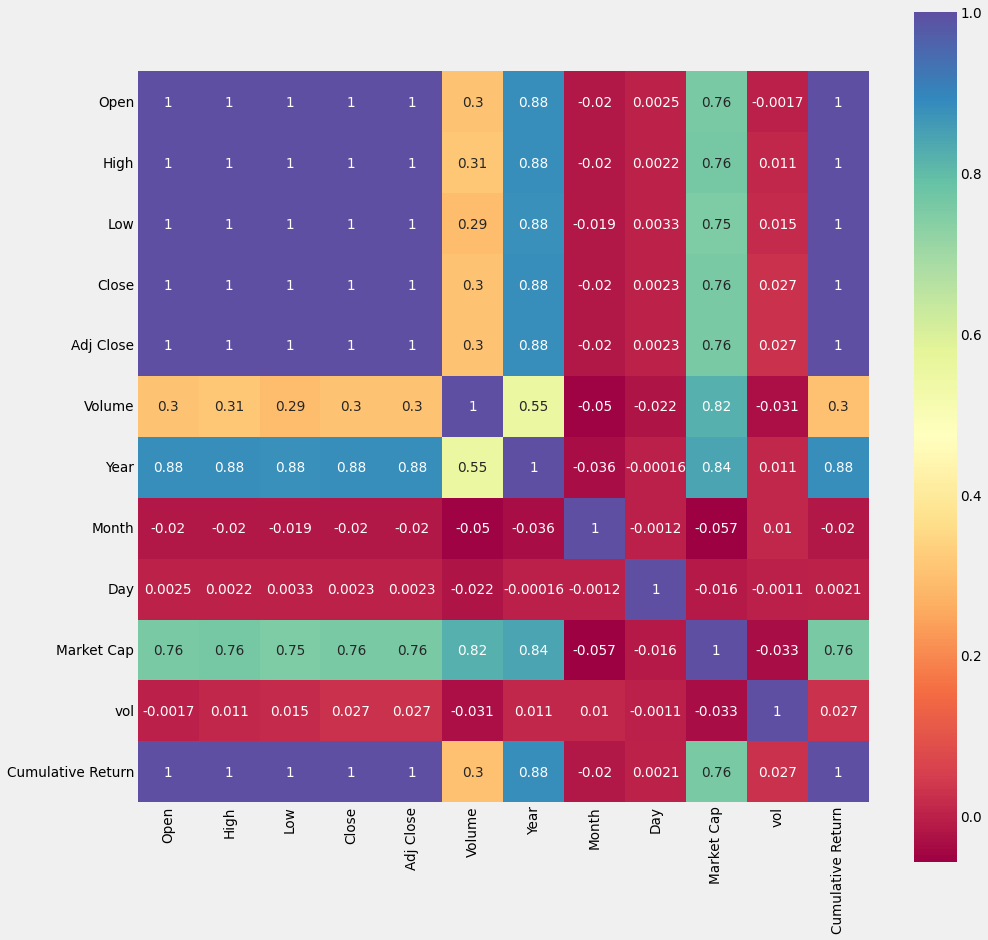

In [137]:
Correlation = DF.corr()
plt.figure(figsize=(15, 15), dpi= 70)
sns.heatmap(Correlation,annot=True, cmap= 'Spectral', square = True)

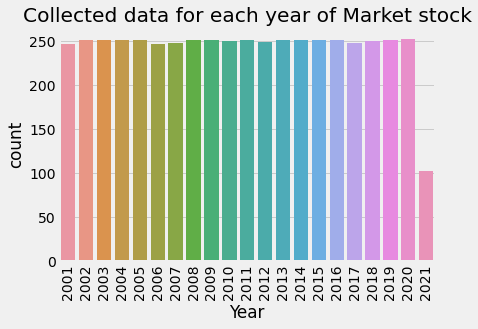

In [138]:
plt.title('Collected data for each year of Market stock')
sns.countplot(x = DF['Year'])
plt.xticks(rotation = 90)
plt.show()

In [139]:
DF['Year'].value_counts()

2020    253
2014    252
2003    252
2004    252
2005    252
2008    252
2019    252
2002    252
2015    252
2013    252
2011    251
2016    251
2009    251
2010    250
2018    250
2012    249
2007    248
2017    248
2001    247
2006    247
2021    102
Name: Year, dtype: int64

# Linear Regression Model 

In [160]:
# Target ==> Close
DF.drop('Date', axis = 1, inplace = True)
DF.drop('Month', axis = 1, inplace = True)
DF.drop('Day', axis = 1, inplace = True)

In [161]:
# DF.drop('vol', axis = 1, inplace = True)
# DF.drop('Cumulative Return', axis = 1, inplace = True)

In [162]:
DF.drop('Index', axis=1, inplace=True)
DF.dropna(inplace=True)

In [163]:
DF.drop('Year', axis = 1, inplace = True)

In [164]:
x = DF.drop('Close', axis=1) # features
y = DF.Close # target 

In [165]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(f"x_train : {x_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

x_train : (4092, 5)
x_test : (1023, 5)
y_train : (4092,)
y_test : (1023,)


In [166]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [167]:
from sklearn import metrics
print(f'MAE : {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'R2 Score : {metrics.r2_score(y_test, y_pred)}')

MAE : 6.829333037825553e-08
MSE : 8.092837508801022e-15
RMSE : 8.996019958182075e-08
R2 Score : 1.0


In [174]:
def check(Dimension, testsize):
    r2 = 1
    for col in x:
        New_col_Name = col + str(Dimension)
        New_col_Val = x[col] ** Dimension
        x.insert(0, New_col_Name, New_col_Val)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=testsize, random_state=0)
        New_Model = LinearRegression()
        New_Model.fit(x_train, y_trai)
        y_pred = New_Model.predict(x_test)
        r2_new = metrics.r2_score(y_test, y_pred)
        if r2_new < r2:
            x.drop([New_col_Name], axis=1, inplace=True)
        else:
            r2 = r2_new
    print('R2 Score: ', r2)
 
check(2, 0.2)        

# LSTM MODEL

In [176]:
DF

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
8815,NYA,2001-01-03,6969.0,6969.0,6969.0,6969.0,6969.0,1.880700e+09,2001,1,3
8816,NYA,2001-01-04,6895.0,6895.0,6895.0,6895.0,6895.0,2.169400e+09,2001,1,4
8817,NYA,2001-01-05,6774.0,6774.0,6774.0,6774.0,6774.0,1.430800e+09,2001,1,5
8818,NYA,2001-01-08,6759.0,6759.0,6759.0,6759.0,6759.0,1.115500e+09,2001,1,8
8819,NYA,2001-01-09,6755.0,6755.0,6755.0,6755.0,6755.0,1.191300e+09,2001,1,9
...,...,...,...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.0,16509.0,16375.0,16465.0,16465.0,2.947400e+09,2021,5,24
13944,NYA,2021-05-25,16465.0,16526.0,16375.0,16390.0,16390.0,3.420870e+09,2021,5,25
13945,NYA,2021-05-26,16390.0,16466.0,16388.0,16452.0,16452.0,3.674490e+09,2021,5,26
13946,NYA,2021-05-27,16452.0,16546.0,16452.0,16532.0,16532.0,5.201110e+09,2021,5,27


In [200]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [179]:
DF_LSTM = DF.copy()
DF_LSTM.drop('Year', axis = 1, inplace = True)
DF_LSTM.drop('Month', axis = 1, inplace = True)
DF_LSTM.drop('Day', axis = 1, inplace = True)
DF_LSTM.drop('Index', axis=1, inplace=True)
DF_LSTM.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5115.000000,5115.000000,5115.000000,5115.000000,5115.000000,5.115000e+03
mean,9023.107136,9067.830108,8973.983578,9024.182600,9024.182600,3.314466e+09
std,2595.602382,2603.037176,2587.608244,2595.835879,2595.835879,1.488607e+09
min,4226.000000,4322.000000,4182.000000,4226.000000,4226.000000,6.180000e+07
25%,6936.500000,6979.500000,6894.500000,6936.500000,6936.500000,2.142415e+09
50%,8534.000000,8565.000000,8471.000000,8534.000000,8534.000000,3.370370e+09
75%,10884.000000,10913.500000,10834.500000,10886.000000,10886.000000,4.096110e+09
max,16590.000000,16686.000000,16532.000000,16590.000000,16590.000000,1.145623e+10


In [180]:
DF_LSTM['Date'] = pd.to_datetime(DF_LSTM['Date'])
DF_LSTM.set_index('Date', inplace=True)
DF_LSTM

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-03,6969.0,6969.0,6969.0,6969.0,6969.0,1.880700e+09
2001-01-04,6895.0,6895.0,6895.0,6895.0,6895.0,2.169400e+09
2001-01-05,6774.0,6774.0,6774.0,6774.0,6774.0,1.430800e+09
2001-01-08,6759.0,6759.0,6759.0,6759.0,6759.0,1.115500e+09
2001-01-09,6755.0,6755.0,6755.0,6755.0,6755.0,1.191300e+09
...,...,...,...,...,...,...
2021-05-24,16375.0,16509.0,16375.0,16465.0,16465.0,2.947400e+09
2021-05-25,16465.0,16526.0,16375.0,16390.0,16390.0,3.420870e+09
2021-05-26,16390.0,16466.0,16388.0,16452.0,16452.0,3.674490e+09


In [184]:
data = DF_LSTM.filter(['Close'])      # to discrete target from the features
dataset = data.values                 #Target Value
training_data_len = math.ceil(len(dataset)* 0.8)

In [185]:
training_data_len

4092

In [186]:
Scaler = MinMaxScaler(feature_range=(0, 1))
Scaled_data = Scaler.fit_transform(dataset)
Scaled_data

array([[0.22185377],
       [0.21586865],
       [0.20608217],
       ...,
       [0.98883856],
       [0.99530896],
       [0.99725008]])

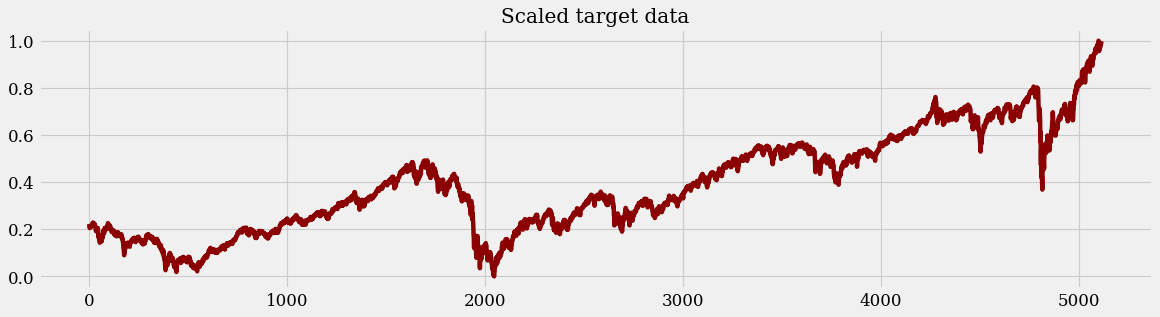

In [195]:
plt.figure(figsize=(16, 4), dpi=80)
plt.plot(Scaled_data, color = 'darkred')
plt.title('Scaled target data', fontfamily = 'serif', fontsize = 18)
plt.xticks(fontfamily = 'serif', fontsize = 15)
plt.yticks(fontfamily = 'serif', fontsize = 15)
plt.show()

In [197]:
train_data = Scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60 : i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.22185377, 0.21586865, 0.20608217, 0.20486897, 0.20454545,
       0.20834681, 0.21101585, 0.20923649, 0.21425105, 0.21239081,
       0.21538337, 0.21117761, 0.21255257, 0.21853769, 0.21942737,
       0.22120673, 0.21878033, 0.22104497, 0.22622129, 0.22573601,
       0.22824329, 0.22282433, 0.22573601, 0.22460369, 0.22225817,
       0.22072145, 0.21692009, 0.22347137, 0.22072145, 0.21578777,
       0.21789065, 0.21230993, 0.20664833, 0.19678098, 0.19492074,
       0.19095762, 0.20082498, 0.1999353 , 0.19435458, 0.19281786,
       0.1942737 , 0.19597218, 0.19888386, 0.20187642, 0.20486897,
       0.19613394, 0.17639922, 0.1793109 , 0.16596571, 0.17033323,
       0.16078939, 0.16806859, 0.15981883, 0.15003235, 0.14251051,
       0.15237787, 0.16022323, 0.17106115, 0.16281139, 0.16167907])]
[0.167583306373342]



In [198]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [199]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4032, 60, 1)

In [206]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(64, return_sequences=True, input_shape = (x_train.shape[1], 1)))
LSTM_model.add(LSTM(64, return_sequences=False))
LSTM_model.add(Dense(32))
LSTM_model.add(Dense(1))

In [208]:
LSTM_model.compile(optimizer='adam', loss= 'mean_squared_error')

In [209]:
LSTM_model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
4032/4032 [==============================] - 124s 29ms/step - loss: 4.2813e-04
Epoch 2/10
4032/4032 [==============================] - 119s 29ms/step - loss: 1.7695e-04
Epoch 3/10
4032/4032 [==============================] - 119s 29ms/step - loss: 1.5540e-04
Epoch 4/10
4032/4032 [==============================] - 119s 29ms/step - loss: 1.3304e-04
Epoch 5/10
4032/4032 [==============================] - 119s 29ms/step - loss: 1.2305e-04
Epoch 6/10
4032/4032 [==============================] - 114s 28ms/step - loss: 1.1585e-04
Epoch 7/10
4032/4032 [==============================] - 113s 28ms/step - loss: 1.1800e-04
Epoch 8/10
4032/4032 [==============================] - 113s 28ms/step - loss: 1.1149e-04
Epoch 9/10
4032/4032 [==============================] - 113s 28ms/step - loss: 1.0426e-04
Epoch 10/10
4032/4032 [==============================] - 114s 28ms/step - loss: 9.9984e-05


In [211]:
test_data = Scaled_data[training_data_len - 60: ,:]
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [212]:
x_test = np.array(x_test)

In [218]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(1023, 60, 1)

In [219]:
prediction = LSTM_model.predict(x_test)
prediction = Scaler.inverse_transform(prediction)

In [221]:
RMSE = np.sqrt(np.mean(prediction - y_test)**2)
RMSE

186.94921206775416

In [222]:
print(f'MAE : {metrics.mean_absolute_error(y_test, prediction)}')
print(f'MSE : {metrics.mean_squared_error(y_test, prediction)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test, prediction))}')
print(f'R2 Score : {metrics.r2_score(y_test, prediction)}')

MAE : 220.93393072611192
MSE : 85286.6642658862
RMSE : 292.0388060958444
R2 Score : 0.9401707915602372


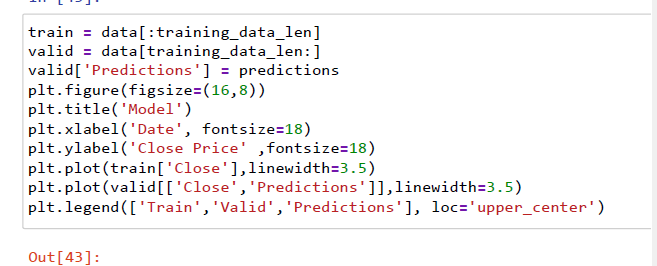

In [225]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = prediction

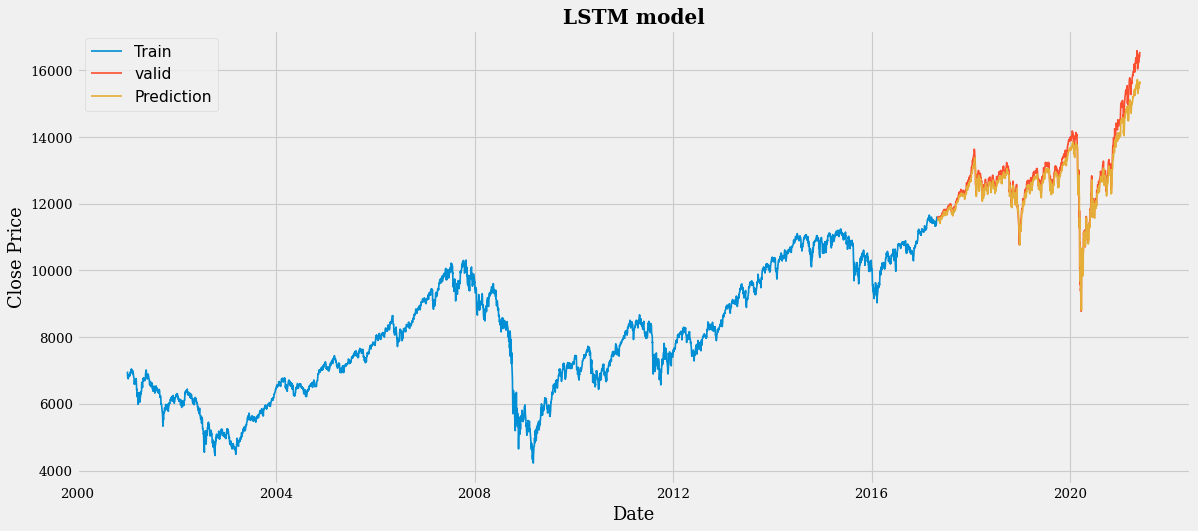

In [250]:
plt.figure(figsize=(16, 7), dpi=80)
plt.title('LSTM model', fontfamily = 'serif', fontsize=18, fontweight='bold')
plt.plot(train['Close'], linewidth=1.5)
plt.plot(valid[['Close', 'Prediction']], linewidth=1.5)
plt.xlabel('Date', fontfamily = 'serif', fontsize=16)
plt.ylabel('Close Price',fontfamily = 'serif', fontsize=16)
plt.xticks(fontfamily = 'serif', fontsize=12)
plt.yticks(fontfamily = 'serif', fontsize=12)
plt.legend(['Train', 'valid', 'Prediction'], loc='best')
plt.show()

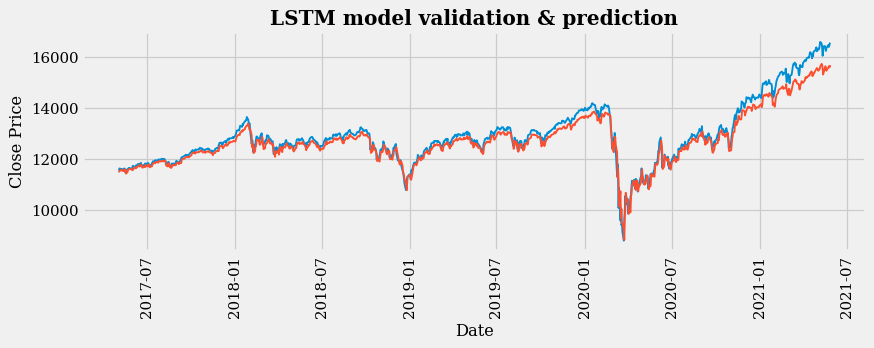

In [244]:
plt.figure(figsize=(10, 3), dpi=90)
plt.title('LSTM model validation & prediction', fontfamily = 'serif', fontsize=16, fontweight='bold')
plt.plot(valid[['Close', 'Prediction']], linewidth=1.5)
plt.xlabel('Date', fontfamily = 'serif', fontsize=13)
plt.ylabel('Close Price',fontfamily = 'serif', fontsize=13)
plt.xticks(fontfamily = 'serif', fontsize=12)
plt.yticks(fontfamily = 'serif', fontsize=12)
plt.xticks(rotation=90)
plt.show()